In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from IPython.display import display

In [3]:
firms = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/firm_names.xlsx')
scores = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/Soc.xlsx', index_col = 0)
returns = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/monthlyreturns.xlsx', index_col = 0)
eu_countrycodes = ['AL','AD', 'AM','AT','BA','BE','BG','CH','CY','DE','DK','EE','ES','FI','FR','GE', 'GB','GR','HR','HU','IE','IS','IT','LT','LV','MC','MK','MT','NL','NO','PL','PT','RO','RS', 'RU','SE','SI', 'TR', 'UA', 'MD', 'LI']


'''Transposing table to get firms as rows, reset columns to dates'''

scores = scores.transpose()
scores.index.rename('ISIN', inplace=True)

firms.set_index("ISIN", inplace=True)

'''Join Social scores to firm's names and locations Filter on firms that are located in Europe'''

scores = scores.join(firms, how="left", on="ISIN")
scores = scores[scores["Country"].isin(eu_countrycodes)]

scores.dropna(how='all', axis='columns', inplace=True)

eu_firm_returns = returns[scores.index]

In [4]:
eu_firm_returns

,AT000000STR1,AT00000VIE62,AT0000606306,AT0000642806,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000767553,...,RU000A0DKVS5,US68370R1095,US69338N2062,US7171402065,RU000A0JRKT8,RU000A0B6NK6,US92927K1025,US97263M1099,US98387E2054,VGG1890L1076
2002-01-31,NaN,0.004704,NaN,NaN,0.044299,0.028358,-0.031736,0.017735,0.011466,-0.000433,...,NaN,0.009666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,NaN,0.056424,NaN,NaN,-0.053178,0.016936,-0.100985,0.001924,0.036171,0.105286,...,NaN,0.143159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,NaN,0.013897,NaN,NaN,0.102579,-0.055194,0.000246,0.012976,-0.027588,0.141121,...,NaN,0.042653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-30,NaN,0.099059,NaN,NaN,0.130746,0.032542,0.279030,0.131208,0.052367,-0.127104,...,NaN,0.012889,NaN,NaN,NaN,NaN,NaN,0.069556,NaN,NaN
2002-05-31,NaN,0.085816,NaN,NaN,0.198617,0.019151,0.177818,-0.015824,0.103447,0.035419,...,NaN,-0.289719,NaN,NaN,NaN,NaN,NaN,-0.033756,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.121001,0.063535,-0.050259,0.042363,-0.035623,0.079594,-0.037375,-0.039665,0.144400,0.042345,...,0.003129,0.000000,0.0,0.0,-0.006342,-0.040000,0.0,0.000000,0.070900,-0.086764
2020-09-30,0.062159,0.043616,0.045772,0.019299,0.066608,-0.007878,-0.048887,0.011063,0.022864,0.019233,...,0.038839,0.000000,0.0,0.0,0.034043,-0.020833,0.0,0.000000,-0.070410,0.129211
2020-10-31,-0.039832,-0.141218,-0.167263,-0.019134,-0.144955,-0.022696,-0.054567,-0.178596,0.027758,-0.019080,...,-0.100450,0.000000,0.0,0.0,-0.020576,-0.021277,0.0,0.000000,0.038995,0.144715
2020-11-30,-0.027859,-0.114198,-0.038687,-0.008375,0.001620,-0.026740,0.114400,-0.043243,0.043868,-0.008422,...,-0.052746,0.000000,0.0,0.0,-0.031513,-0.108696,0.0,0.000000,-0.034274,0.217025


In [5]:
eu_firm_returns_clean=eu_firm_returns.dropna(axis='columns')
eu_firm_returns_clean

,AT00000VIE62,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000767553,AT0000831706,AT0000903851,AT0000908504,...,TRATRKCM91F7,TRATUPRS91E8,TRAVESTL91H6,TRAYKBNK91N6,TREENKA00011,US0528001094,US0543031027,US1672501095,US6074091090,US68370R1095
2002-01-31,0.004704,0.044299,0.028358,-0.031736,0.017735,0.011466,-0.000433,0.035838,0.004304,0.011505,...,0.257666,0.134301,0.215699,0.241805,0.242856,0.122115,-0.030242,0.217787,-0.061532,0.009666
2002-02-28,0.056424,-0.053178,0.016936,-0.100985,0.001924,0.036171,0.105286,0.037705,-0.052905,-0.042130,...,0.037236,0.045479,0.173854,0.063608,0.303799,0.031579,0.069687,-0.059906,-0.024658,0.143159
2002-03-31,0.013897,0.102579,-0.055194,0.000246,0.012976,-0.027588,0.141121,0.085674,0.058557,0.000929,...,-0.149425,-0.272840,-0.180866,-0.215166,-0.197436,0.135636,0.060035,0.137466,-0.009135,0.042653
2002-04-30,0.099059,0.130746,0.032542,0.279030,0.131208,0.052367,-0.127104,0.014885,0.093128,0.020480,...,0.049753,-0.137208,0.022429,0.154606,0.214858,0.029997,0.043617,0.050443,0.096669,0.012889
2002-05-31,0.085816,0.198617,0.019151,0.177818,-0.015824,0.103447,0.035419,0.017236,0.079780,0.029356,...,-0.005938,0.030138,-0.031908,-0.029673,-0.164654,-0.083345,0.022999,0.009056,-0.166292,-0.289719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.063535,-0.035623,0.079594,-0.037375,-0.039665,0.144400,0.042345,0.044470,0.042349,-0.012405,...,0.001481,-0.071074,0.062372,-0.119882,0.006191,0.072525,0.000000,0.000000,-0.002703,0.000000
2020-09-30,0.043616,0.066608,-0.007878,-0.048887,0.011063,0.022864,0.019233,0.190587,0.019247,0.113779,...,0.004091,-0.069528,-0.004015,-0.086601,-0.048206,0.169086,0.000000,0.000000,0.059830,0.000000
2020-10-31,-0.141218,-0.144955,-0.022696,-0.054567,-0.178596,0.027758,-0.019080,-0.060020,-0.019081,-0.033063,...,0.137492,-0.065952,-0.116738,-0.013223,0.009711,-0.023066,0.000000,0.000000,-0.072649,0.000000
2020-11-30,-0.114198,0.001620,-0.026740,0.114400,-0.043243,0.043868,-0.008422,0.004445,-0.008425,-0.093658,...,-0.081222,-0.130276,-0.116686,-0.059755,-0.044045,-0.008733,0.000000,0.000000,-0.095680,0.000000


<AxesSubplot:>

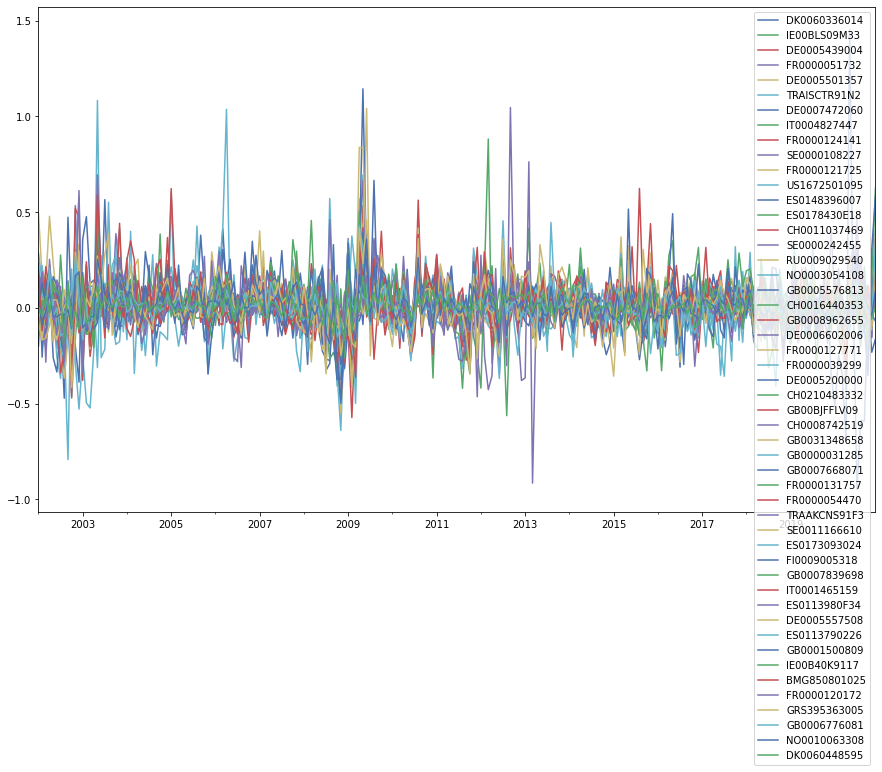

In [152]:
eu_firm_returns_50= eu_firm_returns_clean.sample(n=50,axis='columns')
eu_firm_returns_50.plot(figsize=(15,9.3))

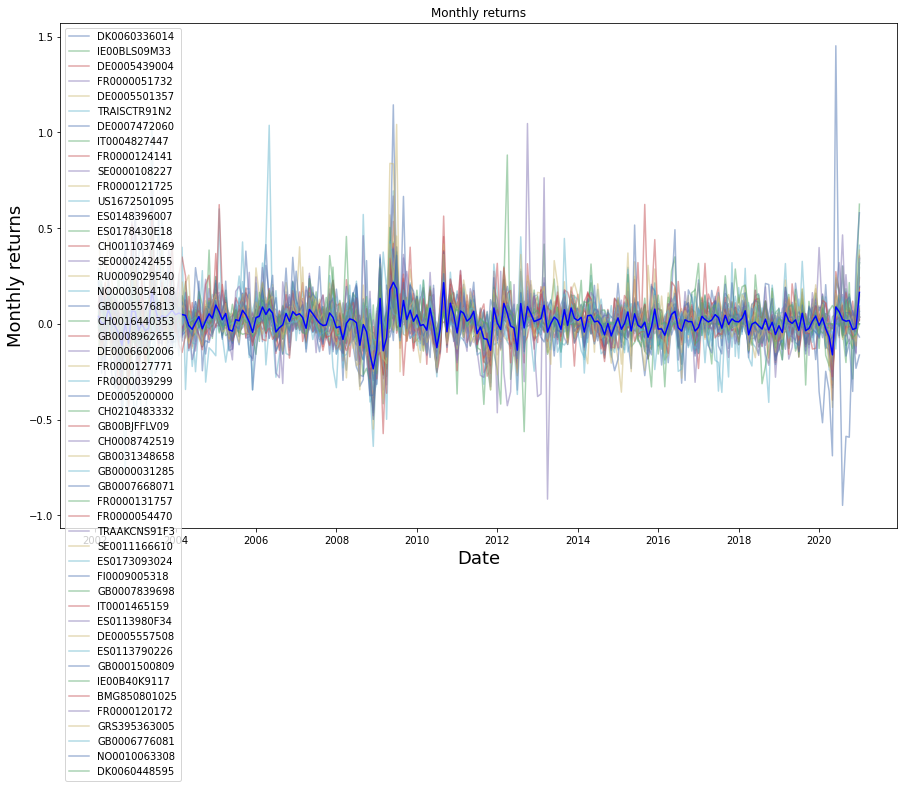

In [188]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (15,9.3) # https://pythonguides.com/matplotlib-increase-plot-size/


plt.plot(eu_firm_returns_50,label=eu_firm_returns_50.columns,alpha=0.5)
#eu_firm_returns_50.plot(figsize=(15,10))
plt.plot(eu_firm_returns_50.mean(axis=1),color='b')
plt.title('Monthly returns')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Monthly returns',fontsize=18)
plt.legend(eu_firm_returns_50.columns.values,loc='upper left')
plt.savefig('50-mean.png')
plt.show()

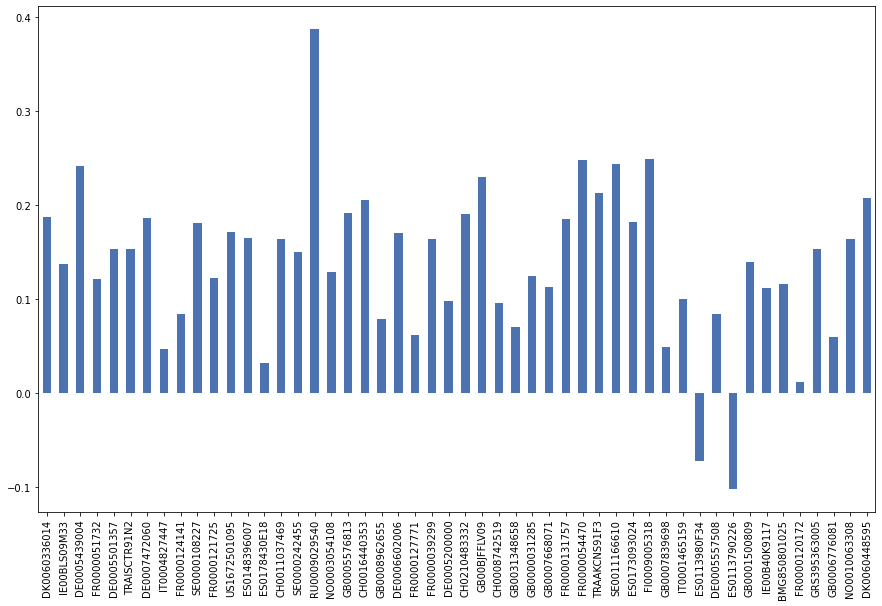

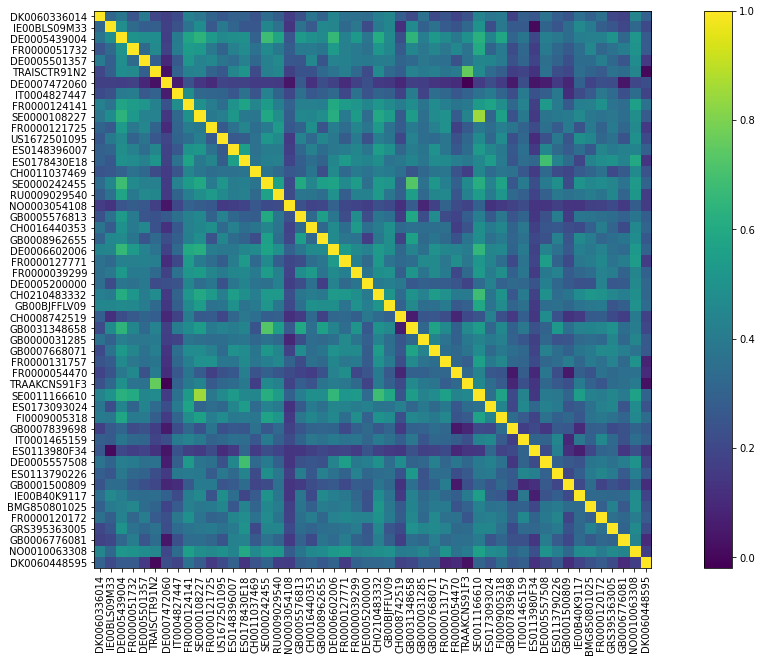

In [189]:
annualized_ret=eu_firm_returns_50.mean()*12
cov_matr=eu_firm_returns_50.cov()*12
annualized_ret.plot(kind='bar')
plt.savefig('Bar-AnnualizedReturns-50.png')
plotting.plot_covariance(cov_matr, plot_correlation=True);
plt.savefig('cov-matrix-50.png')

In [214]:
#compute the min variance portfolio every month
'''
for (index, row) in df.iterrows():
'''
min_var_weights=[]
N_yrs=12 #number of past months we want to keep. Here it is the equivalent of 1 years
monthly_performance=[]
min_max_returns=[]
for i in range(eu_firm_returns_50.shape[0]-N_yrs):#we only compute monthly portfolio for the last N Yrs
    monthly_ret=eu_firm_returns_50[:(N_yrs+i)].mean()*12
    monthly_cov=eu_firm_returns_50[:(N_yrs+i)].cov()*12
    monthly_ef=EfficientFrontier(monthly_ret,monthly_cov)
    min_max_returns.append([monthly_ret.min(),monthly_ret.max()])
   #min_var_monthly_portfolio=monthly_ef.min_volatility()
    monthly_ef.min_volatility()
    monthly_performance.append(list(monthly_ef.portfolio_performance()))
    min_var_weights.append(monthly_ef.clean_weights())

min_var_weights=pd.DataFrame(min_var_weights)
min_var_weights

,DK0060336014,IE00BLS09M33,DE0005439004,FR0000051732,DE0005501357,TRAISCTR91N2,DE0007472060,IT0004827447,FR0000124141,SE0000108227,...,DE0005557508,ES0113790226,GB0001500809,IE00B40K9117,BMG850801025,FR0000120172,GRS395363005,GB0006776081,NO0010063308,DK0060448595
0,0.00000,0.00000,0.0,0.0,0.19391,0.0,0.00765,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.00000,0.11331,0.00000,0.0,0.10403
1,0.00000,0.00000,0.0,0.0,0.12038,0.0,0.01010,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.00000,0.12998,0.00000,0.0,0.05602
2,0.02742,0.00000,0.0,0.0,0.14453,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.00665,0.10685,0.00000,0.0,0.04948
3,0.12038,0.00000,0.0,0.0,0.06491,0.0,0.00596,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.00000,0.10526,0.00000,0.0,0.00199
4,0.10780,0.00000,0.0,0.0,0.09665,0.0,0.00365,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.00000,0.08874,0.00000,0.0,0.00274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.00000,0.00633,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.09908,0.0,0.00000,0.00000,0.06110,0.0,0.10506
212,0.00131,0.00161,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.10234,0.0,0.00000,0.00000,0.06184,0.0,0.10242
213,0.00168,0.00124,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.10261,0.0,0.00000,0.00000,0.06146,0.0,0.10350
214,0.00532,0.00101,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.10277,0.0,0.00000,0.00000,0.06012,0.0,0.09996


<AxesSubplot:xlabel='Date'>

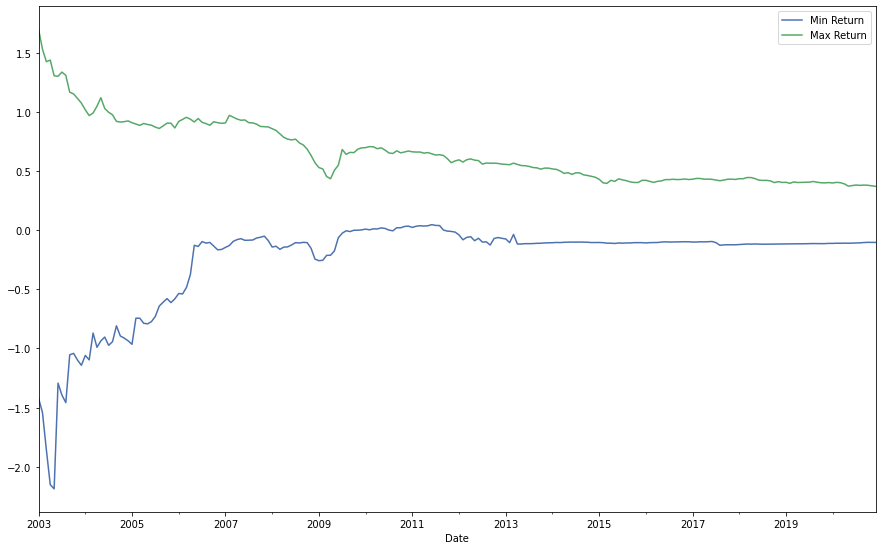

In [221]:
min_max_returns=pd.DataFrame(min_max_returns,columns=["Min Return", "Max Return"])
min_max_returns['Date']=pd.date_range(start='2003/01/30', periods=len(min_max_returns), freq='1M')
min_max_returns.plot('Date')

In [217]:
monthly_performance=pd.DataFrame(monthly_performance,columns=["Expected Returns", "Volatility", "Sharpe ratio"])
monthly_performance['Date']=pd.date_range(start='2003/01/30', periods=len(monthly_performance), freq='1M')
monthly_performance

,Expected Returns,Volatility,Sharpe ratio,Date
0,-0.008111,0.064049,-0.438895,2003-01-31
1,0.002926,0.063973,-0.266889,2003-02-28
2,0.031624,0.062473,0.186063,2003-03-31
3,0.024809,0.060724,0.079187,2003-04-30
4,0.047570,0.059446,0.463791,2003-05-31
...,...,...,...,...
211,0.091436,0.111690,0.639588,2020-08-31
212,0.092634,0.111706,0.650227,2020-09-30
213,0.093324,0.111482,0.657724,2020-10-31
214,0.091410,0.111630,0.639708,2020-11-30


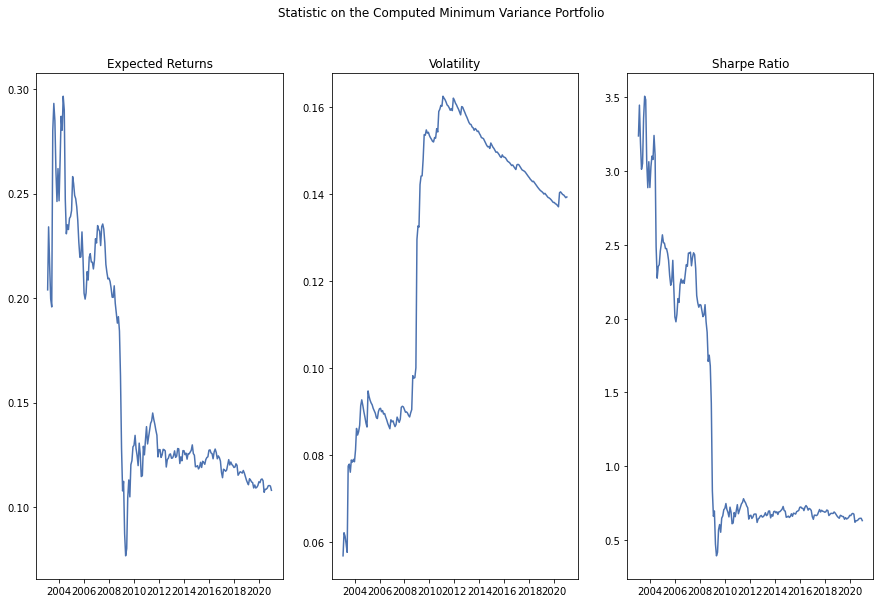

In [206]:
# Create figure
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.plot(monthly_performance['Date'],monthly_performance['Expected Returns'])#expected returns
plt.title('Expected Returns')
plt.subplot(1, 3, 2)
plt.plot(monthly_performance['Date'],monthly_performance['Volatility'])#volatility
plt.title('Volatility')
plt.subplot(1, 3, 3)
plt.plot(monthly_performance['Date'],monthly_performance['Sharpe ratio'])#sharpe ratio
plt.title('Sharpe Ratio')
# One Title
plt.suptitle('Statistic on the Computed Minimum Variance Portfolio')

# Auto adjust
#plt.tight_layout()

#plt.figure(figsize=(5,15))
plt.savefig('monthly-performance-H.png',dpi=200)
# Display
plt.show()



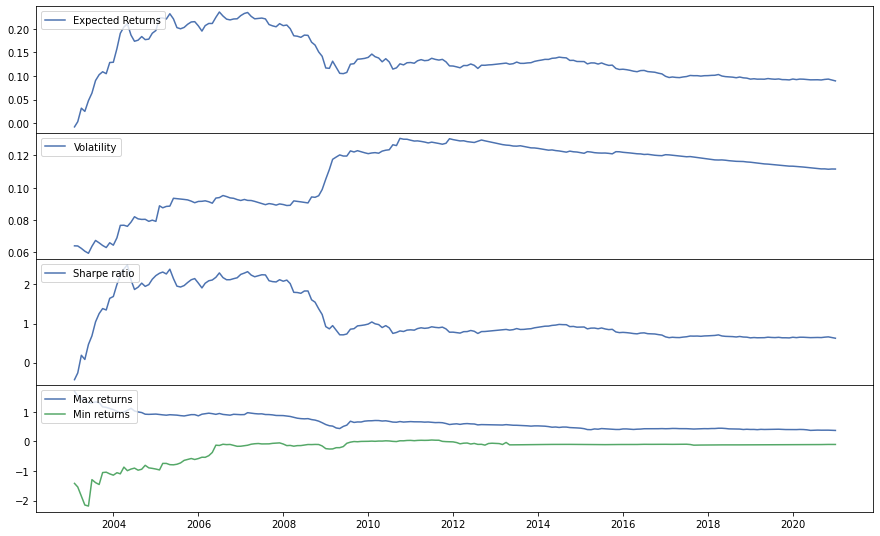

In [225]:
#Alternative way of ploting the statistics of the monthly portfolio
fig, axs = plt.subplots(4, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(monthly_performance['Date'], monthly_performance['Expected Returns'],label='Expected Returns')
axs[0].legend(loc='upper left')
#axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
#axs[0].set_ylim(-1, 1)

axs[1].plot(monthly_performance['Date'], monthly_performance['Volatility'],label='Volatility')
axs[1].legend(loc='upper left')
#axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
#axs[1].set_ylim(0, 1)

axs[2].plot(monthly_performance['Date'], monthly_performance['Sharpe ratio'],label='Sharpe ratio')
axs[2].legend(loc='upper left')
#axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
#axs[2].set_ylim(-1, 1)

axs[3].plot(min_max_returns['Date'], min_max_returns['Max Return'],label='Max returns')
axs[3].plot(min_max_returns['Date'], min_max_returns['Min Return'],label='Min returns')
axs[3].legend(loc='upper left')

plt.savefig('monthly-performance-V.png')
plt.show()

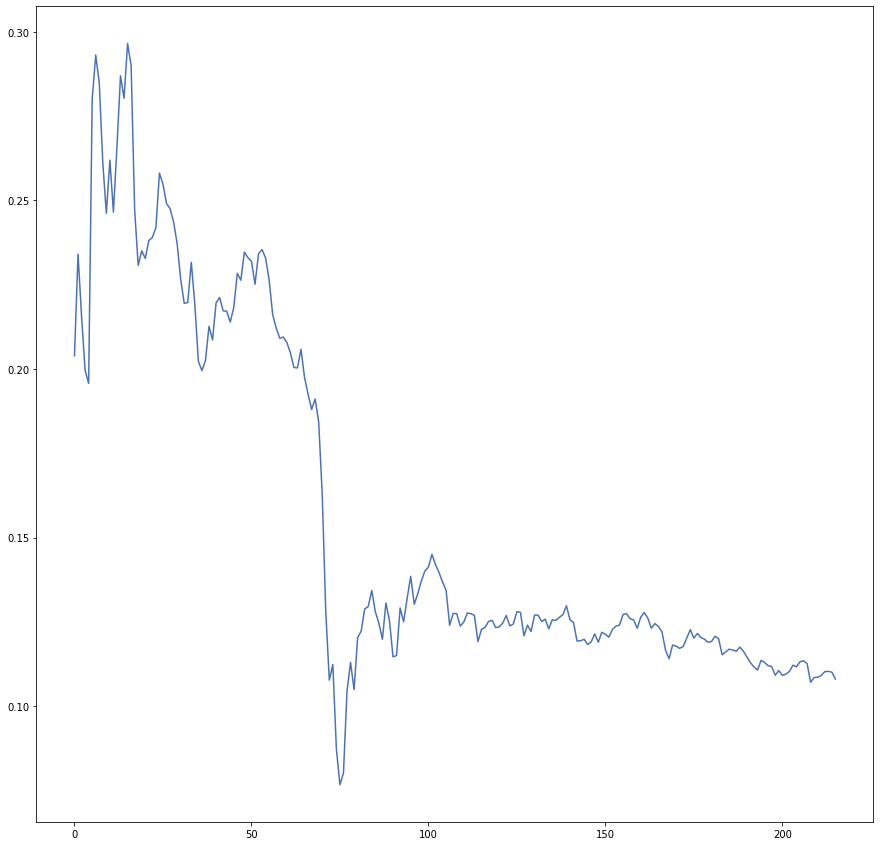

<Figure size 288x288 with 0 Axes>

In [150]:
plt.plot(monthly_performance['Expected Returns'])
plt.figure(figsize=(4,4))
plt.show()

In [134]:
ef= EfficientFrontier(annualized_ret,cov_matr)

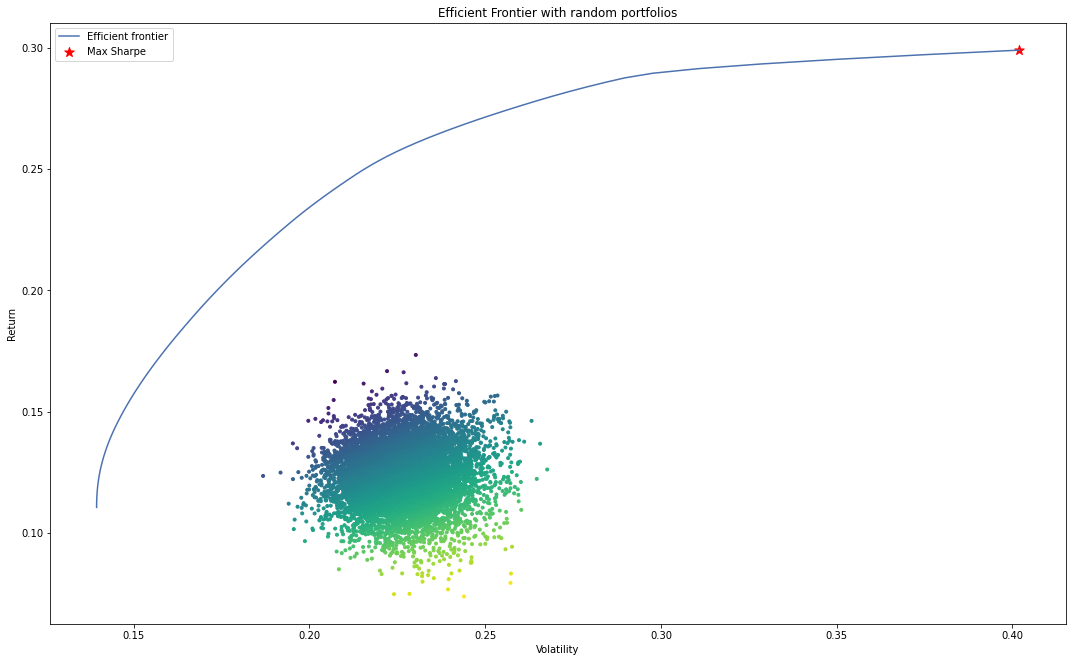

In [154]:
# code from https://www.forecaster.site/portfolio-optimization-with-python/

ef= EfficientFrontier(annualized_ret,cov_matr)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
#plotting.plot_efficient_frontier(ef, ax=ax)

# Find the tangency portfolio
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(annualized_ret)), n_samples)
rets = w.dot(annualized_ret)
stds = np.sqrt(np.diag(w @ cov_matr @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

InstantiationError: The objective function was changed after the initial optimization. Please create a new instance instead.

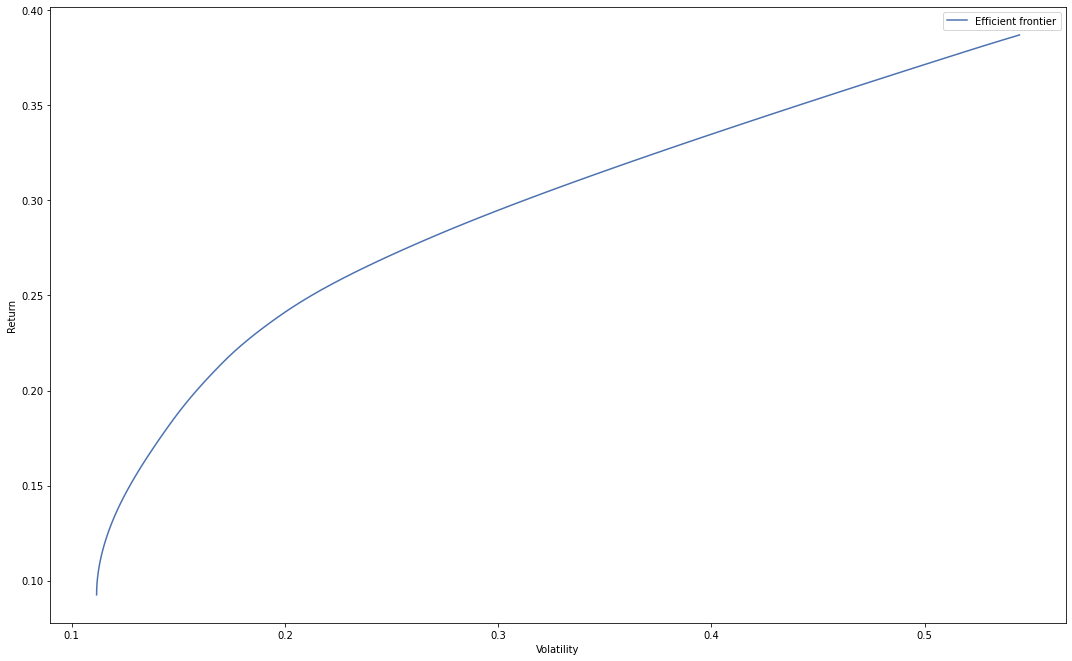

In [250]:
#code from https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/2-Mean-Variance-Optimisation.ipynb
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(annualized_ret, cov_matr)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

In [243]:
it_num=int(0.16/0.02)
ef=EfficientFrontier(annualized_ret,cov_matr)
temp=[]
for i in range(it_num):
    ef.efficient_return(0.02+i*0.02)
    print(0.02+i*0.02)
    temp.append(ef.portfolio_performance())


0.02
0.04
0.06
0.08
0.1
0.12000000000000001
0.13999999999999999
0.16


In [246]:
ef=EfficientFrontier(annualized_ret,cov_matr)
ef.efficient_return(0.02)
ef.portfolio_performance()

(0.09251001522962433, 0.11169351349275478, 0.6491873427755305)

Expected annual return: 21.4%
Annual volatility: 17.0%
Sharpe Ratio: 1.14


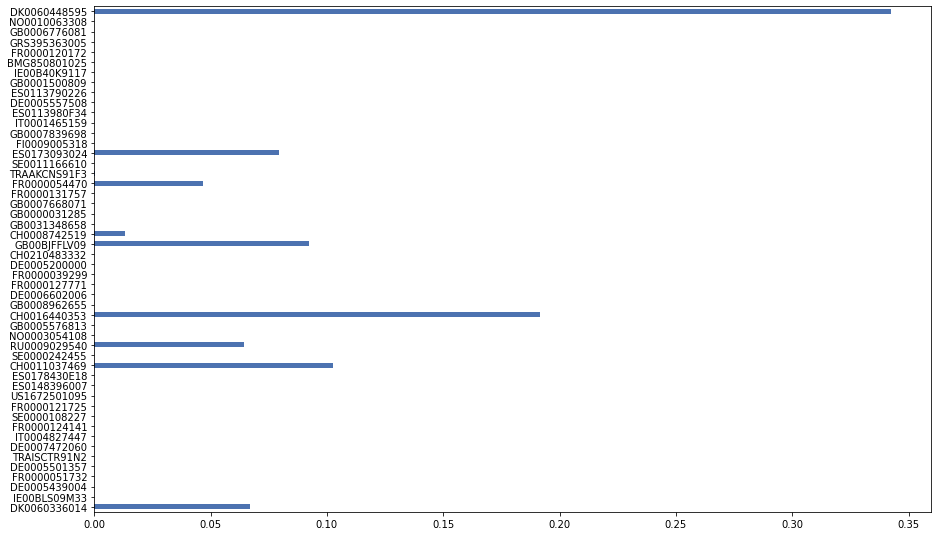

In [251]:
# we build the optimal portfolio-> maximal Sharpe ratio (a.k.a the tangency portfolio)
ef= EfficientFrontier(annualized_ret,cov_matr)
ef.max_sharpe()
weights= ef.clean_weights()
ef.portfolio_performance(verbose=True)
#pd.Series(weights).plot.pie(figsize=(10,10));
pd.Series(weights).plot.barh();
plt.savefig('weigths-tang-port.png')

In [61]:
euro_stoxx_600_data = yf.download("^STOXX", period="max")
euro_stoxx_600_data_prices = euro_stoxx_600_data["Adj Close"].dropna(how="all")
euro_stoxx_600_data_prices=pd.DataFrame(euro_stoxx_600_data_prices)
#euro_stoxx_600_data_prices.groupby(euro_stoxx_600_data_prices.index.year)
euro_stoxx_600_data_returns=euro_stoxx_600_data_prices.pct_change()[1:]
#euro_stoxx_600_data_returns
#euro_stoxx_600_data_returns=euro_stoxx_600_data_returns.groupby(by=[euro_stoxx_600_data_returns.index.month, euro_stoxx_600_data_returns.index.year])
#euro_stoxx_600_data_returns.resample('M').agg(lambda x: (x + 1).prod() - 1)

#code from https://towardsdatascience.com/how-to-group-data-by-different-time-intervals-using-python-pandas-eb7134f9b9b0
euro_stoxx_600_data_returns.index = pd.to_datetime(euro_stoxx_600_data_returns.index)
euro_stoxx_600_data_returns = euro_stoxx_600_data_returns.resample('1M').mean()*30 #we compute the
#euro_stoxx_600_data_returns.index = pd.to_datetime(euro_stoxx_600_data_returns.index, format="%Y%m").to_period('M')
euro_stoxx_600_data_returns
#euro_stoxx_600_data_returns.groupby(pd.Grouper(key='Date',freq='M'))

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2004-04-30,-0.246110
2004-05-31,-0.011796
2004-06-30,0.022958
2004-07-31,-0.024881
2004-08-31,-0.015197
...,...
2021-11-30,-0.035210
2021-12-31,0.078875
2022-01-31,-0.056876


In [81]:
#quick check of the mean return values
#daily returns for the first month
print('daily price changes: ')
print(euro_stoxx_600_data_prices.pct_change()[1:5])
#manual arithmetic mean -> sum/days
print('daily average return over a month: ',(euro_stoxx_600_data_prices.pct_change()[1:5].sum())/4)
#this is the daily average return over the month. We transform this into a monthly average return by multiplying by 30
print('monthly average return: ',((euro_stoxx_600_data_prices.pct_change()[1:5].sum())/4)*30)
# we find the same values -> check
#euro_stoxx_600_data_returns.mean()*12

daily price changes: 
            Adj Close
Date                 
2004-04-27  -0.000607
2004-04-28  -0.014337
2004-04-29  -0.008752
2004-04-30  -0.009119
daily average return over a month:  Adj Close   -0.008204
dtype: float64
monthly average return:  Adj Close   -0.24611
dtype: float64


In [181]:
#Code Mathieu for daily returns -> monthly returns and adding it to the monthly performance dataset
#monthly_performance[3] = (euro_stoxx_600_data_returns.mean()*30).unstack(level=-1).transpose().values.flatten()[-168:]


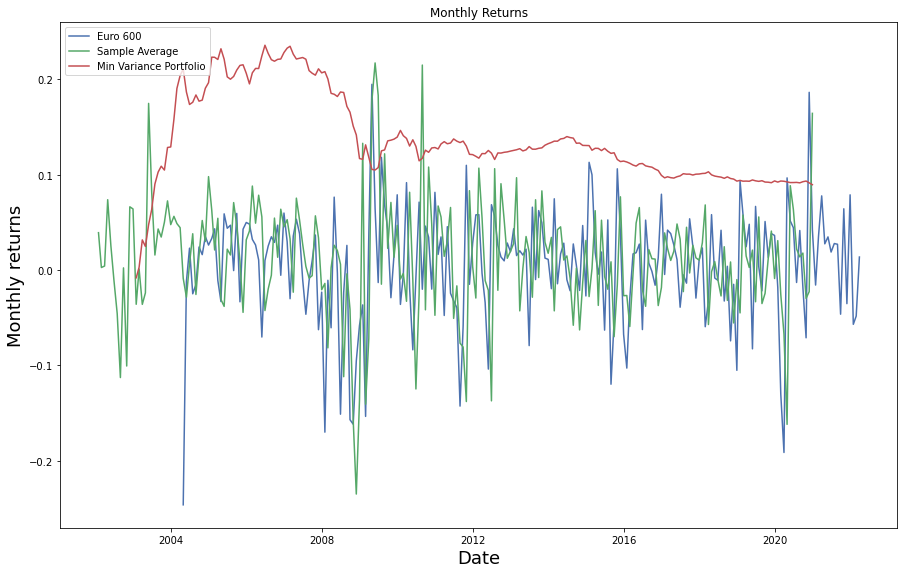

In [252]:
plt.plot(euro_stoxx_600_data_returns)
plt.plot(eu_firm_returns_50.mean(axis=1))
plt.plot(monthly_performance['Date'],monthly_performance['Expected Returns'])

plt.title('Monthly Returns')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Monthly returns',fontsize=18)
plt.legend(['Euro 600','Sample Average','Min Variance Portfolio'],loc='upper left')
plt.savefig('benchmark.png')
plt.show()


In [159]:
#We now want to plot the timeseries of the Stoxx index and our mean-variance portfolio returns
'''
First adjust the time scales for both series. The Stoxx has values from 2004/04/30 to 2022/03/31 and our portfolio computation goes from 2002/01/31 + N_yrs
to 2020/03/31

this means that we need to remove the first (27-N_yrs) months from monthly_performance
and we need to remove the last 15 months from euro_stoxx_600_data_returns
'''
start=26-N_yrs
monthly_performance_comp=monthly_performance[start:]
monthly_performance_comp['Euro 600']=euro_stoxx_600_data_returns[:-14].values
monthly_performance_comp
#monthly_performance[3]=euro_stoxx_600_data_returns[:-14].values

/var/folders/0d/gwzvz0b94t58_d5v6cmr4zpw0000gn/T/ipykernel_60328/3026391078.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_performance_comp['Euro 600']=euro_stoxx_600_data_returns[:-14].values


,Expected Returns,Volatility,Sharpe ratio,Date,Euro 600
14,0.280330,0.084580,3.077924,2004-03-31,-0.246110
15,0.296586,0.085348,3.240702,2004-04-30,-0.011796
16,0.289983,0.086827,3.109434,2004-05-31,0.022958
17,0.247166,0.091301,2.488104,2004-06-30,-0.024881
18,0.230744,0.092678,2.273932,2004-07-31,-0.015197
...,...,...,...,...,...
211,0.109064,0.139887,0.636684,2020-08-31,-0.018138
212,0.110210,0.139782,0.645364,2020-09-30,-0.071007
213,0.110279,0.139470,0.647299,2020-10-31,0.186339
214,0.110063,0.139163,0.647177,2020-11-30,0.042300


In [72]:
mu = expected_returns.capm_return(euro_stoxx_600_data_prices)
mu

Adj Close    0.034712
Name: mkt, dtype: float64

In [42]:
#monthly_performance_comp = pd.concat([monthly_performance[14:], euro_stoxx_600_data_returns[:-14]])

<AxesSubplot:>

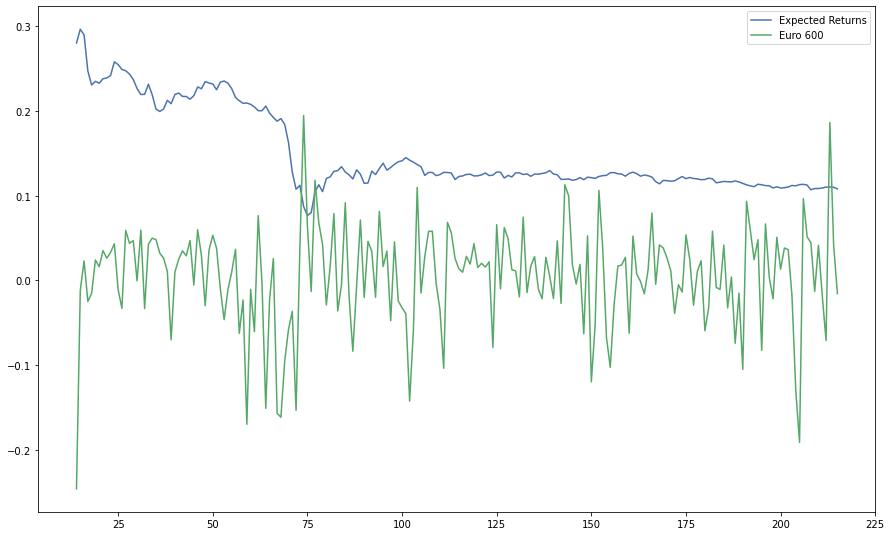

In [160]:
monthly_performance_comp.plot(y=['Expected Returns','Euro 600'])

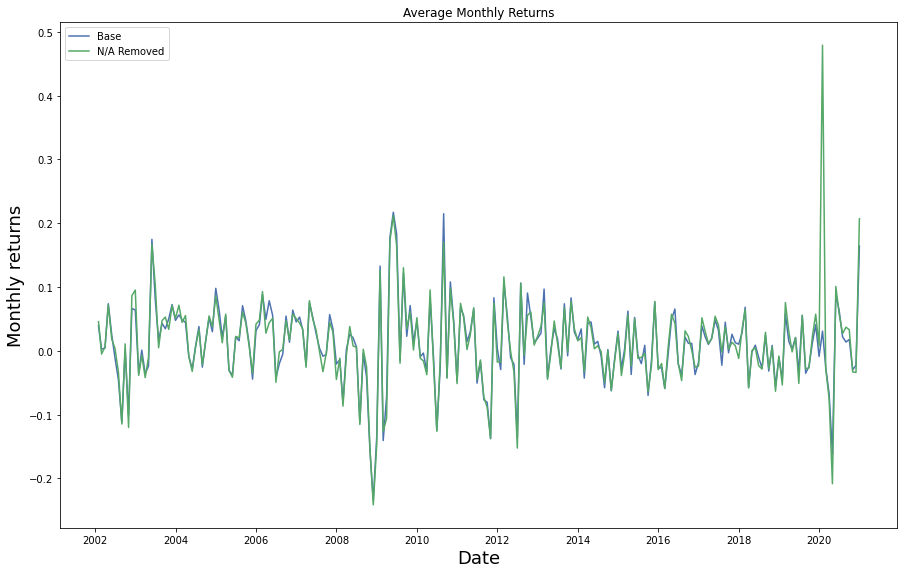

In [184]:
plt.plot(eu_firm_returns_50.mean(axis=1))
plt.plot(eu_firm_returns_clean.mean(axis=1))
plt.title('Average Monthly Returns')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Monthly returns',fontsize=18)
plt.legend(['Base','N/A Removed'])
plt.savefig('Comp-NA.png')
plt.show()